6. Music Recommendation System

Goal: luster songs based on user preferences and recommend similar tracks.

Dataset: Spotify API or Million Song Dataset.

Clustering Algorithm: K-Means or Agglomerative Clustering.

Output: Personalized music recommendations.

K-Means Silhouette Score: 0.22760508309260902
Agglomerative Silhouette Score: 0.16396428744189417
DBSCAN Silhouette Score: -0.3320186955042747


<Figure size 1500x500 with 0 Axes>

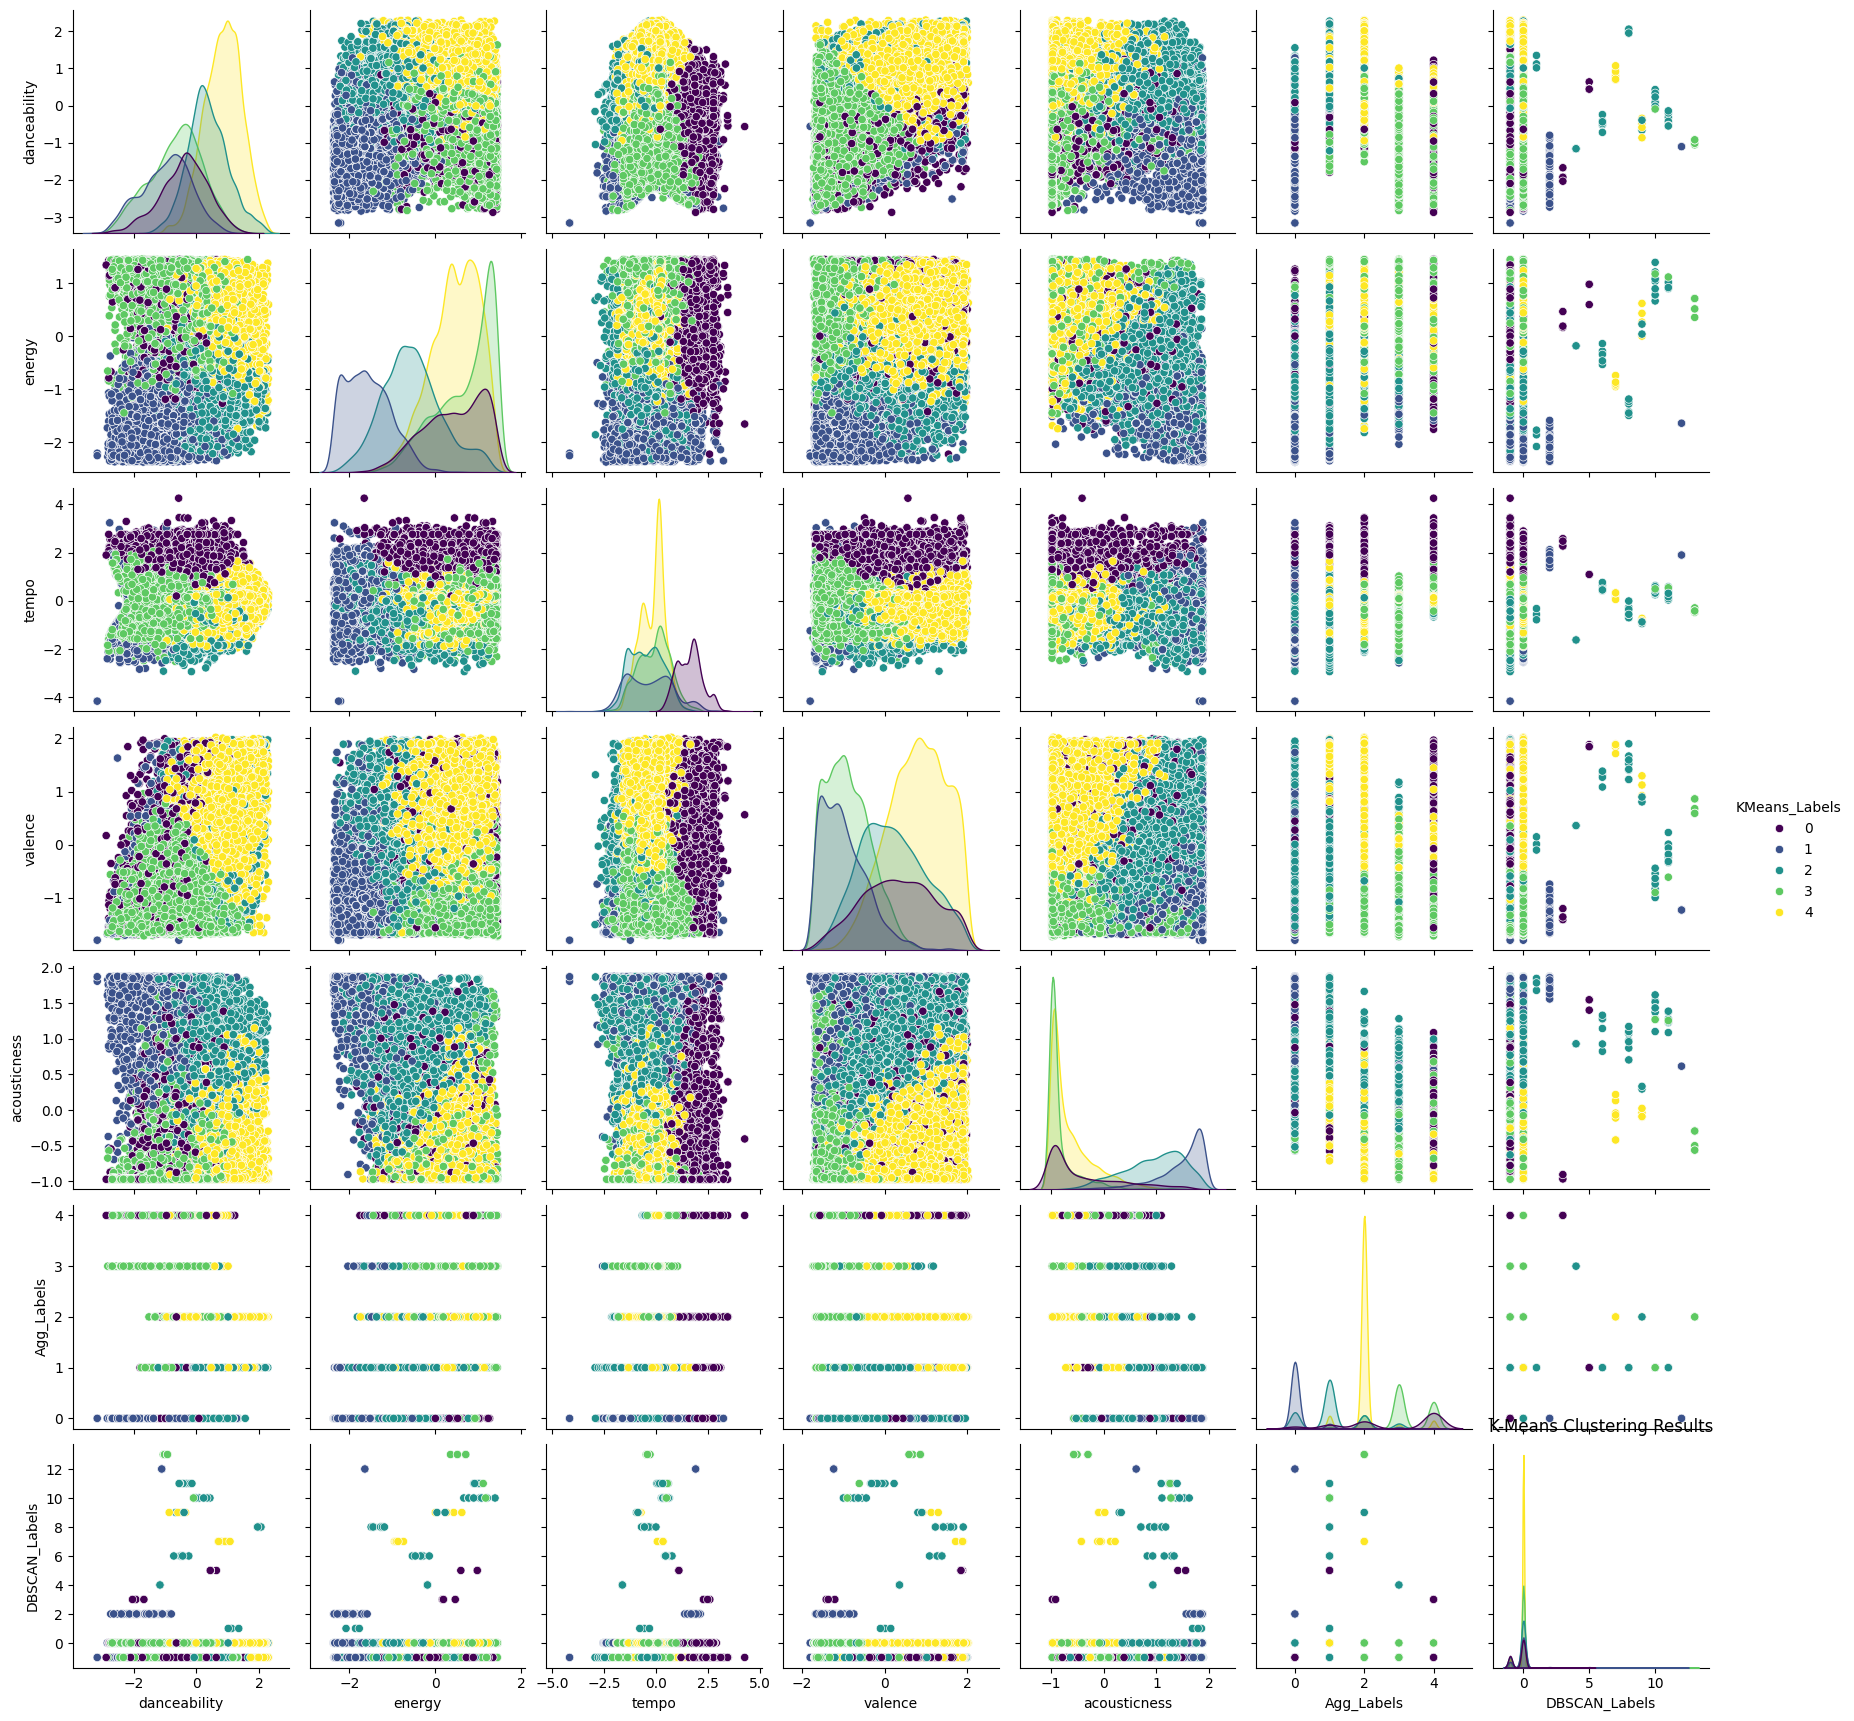

<Figure size 1500x500 with 0 Axes>

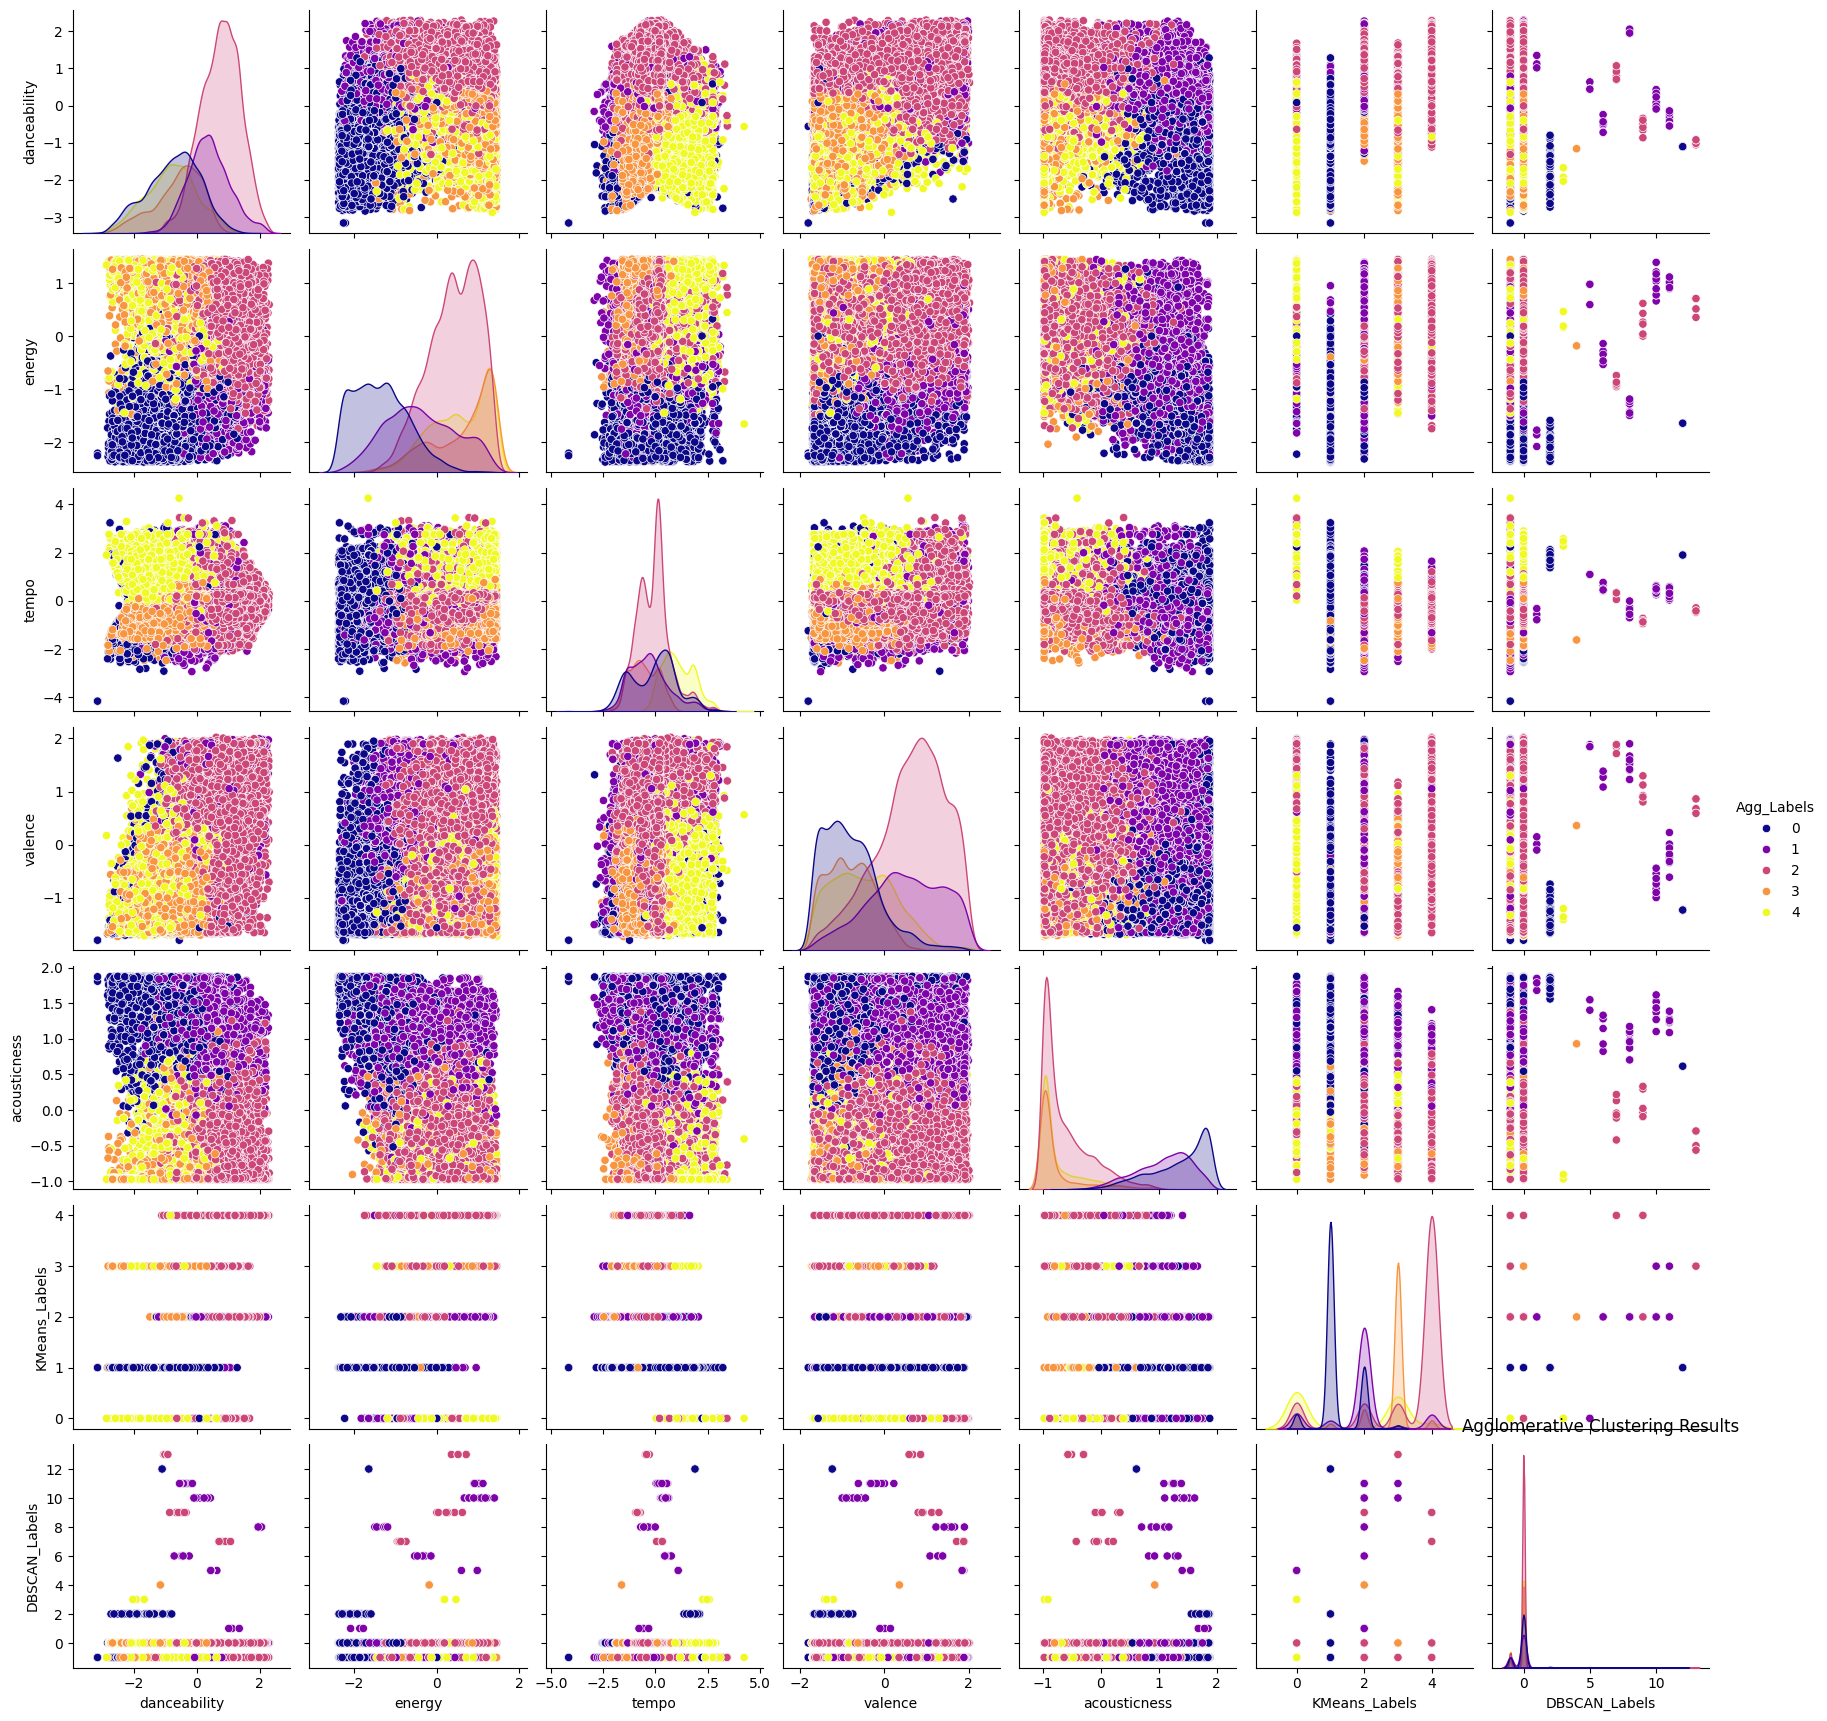

<Figure size 1500x500 with 0 Axes>

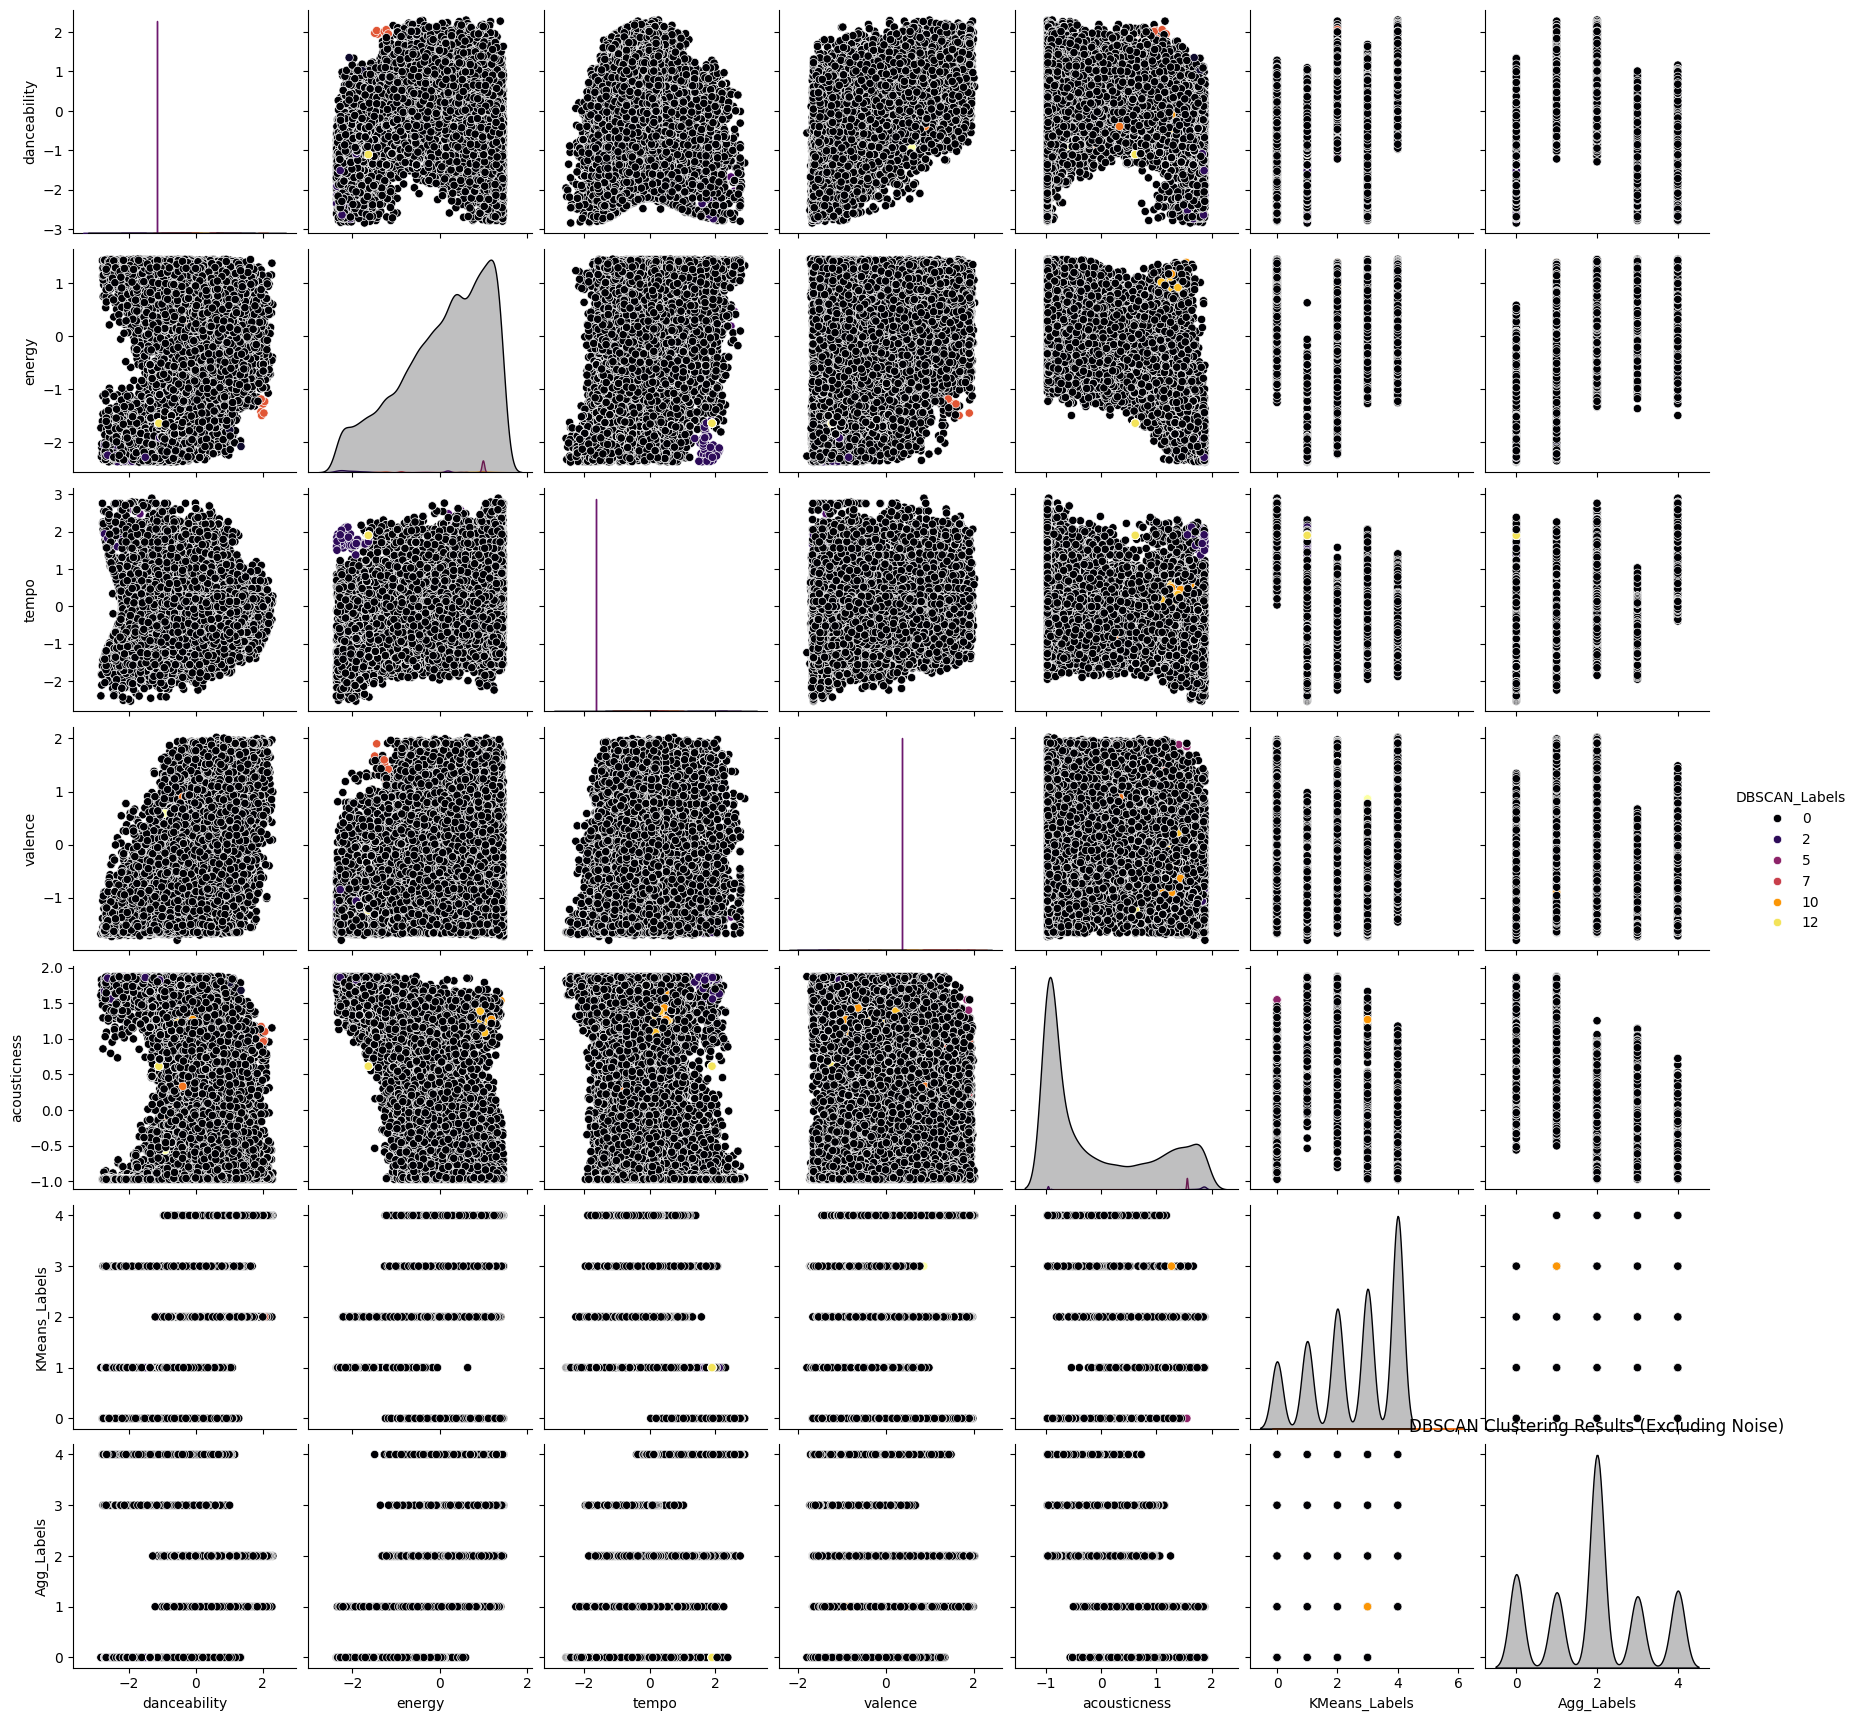

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset
data = pd.read_csv('dataset.csv')
data.head()

#cleaning the data
data.dropna(inplace=True)
data.isnull().sum()

# Selecting relevant features
features = ['danceability', 'energy', 'tempo', 'valence', 'acousticness']
X = data[features]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X_scaled)
agg_score = silhouette_score(X_scaled, agg_labels)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)
# For DBSCAN, filter noise points (-1 label) before scoring
dbscan_score = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]) if len(set(dbscan_labels)) > 1 else -1

# Printing scores
print(f"K-Means Silhouette Score: {kmeans_score}")
print(f"Agglomerative Silhouette Score: {agg_score}")
print(f"DBSCAN Silhouette Score: {dbscan_score}")

# Visualizing the clustering results using Seaborn Pairplot
cluster_data = pd.DataFrame(X_scaled, columns=features)
cluster_data['KMeans_Labels'] = kmeans_labels
cluster_data['Agg_Labels'] = agg_labels
cluster_data['DBSCAN_Labels'] = dbscan_labels

plt.figure(figsize=(15, 5))
sns.pairplot(cluster_data, hue='KMeans_Labels', palette='viridis')
plt.title('K-Means Clustering Results', y=1.02)
plt.show()

plt.figure(figsize=(15, 5))
sns.pairplot(cluster_data, hue='Agg_Labels', palette='plasma')
plt.title('Agglomerative Clustering Results', y=1.02)
plt.show()

plt.figure(figsize=(15, 5))
sns.pairplot(cluster_data[cluster_data['DBSCAN_Labels'] != -1], hue='DBSCAN_Labels', palette='inferno')
plt.title('DBSCAN Clustering Results (Excluding Noise)', y=1.02)
plt.show()

